 # **Movie Recommendation System**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
data = pd.read_csv('Movies.csv')

display(data)

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1.0,Four Rooms,Crime Comedy,en,4000000.0,22.876230,09-12-1995,4300000.0,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2.0,Star Wars,Adventure Action Science Fiction,en,11000000.0,126.393695,25-05-1977,775398007.0,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3.0,Finding Nemo,Animation Family,en,94000000.0,85.688789,30-05-2003,940335536.0,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4.0,Forrest Gump,Comedy Drama Romance,en,55000000.0,138.133331,06-07-1994,677945399.0,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5.0,American Beauty,Drama,en,15000000.0,80.878605,15-09-1999,356296601.0,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,4784.0,Midnight Cabaret,Horror,en,0.0,0.001389,01-01-1990,0.0,94.0,0.0,...,NaN,NaN,A Broadway producer puts on a play with a Devi...,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,"[{'name': 'Pece Dingo', 'gender': 0, 'departme...",Pece Dingo
4766,4785.0,Growing Up Smith,Comedy Family Drama,en,0.0,0.710870,03-02-2017,0.0,102.0,7.4,...,http://www.growingupsmithmovie.com,NaN,"In 1979, an Indian family moves to America wit...",[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,"[{'name': 'Frank Lotito', 'gender': 0, 'depart...",Frank Lotito
4767,4786.0,8 Days,Thriller Drama,en,0.0,0.015295,15-06-2014,0.0,90.0,0.0,...,NaN,christian film sex trafficking,"After sneaking to

**Data Description**

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   float64
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   float64
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   float64
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   float64
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

None

In [4]:
display(data.columns)

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

**Get Feature Selection**

In [5]:
data_features = data[['Movie_Genre', 'Movie_Keywords', 'Movie_Tagline', 'Movie_Cast', 'Movie_Director']].fillna('')

display(data_features)

# Selected five existing features to recommend movies.
# It may vary from one project to another.
# Like one can add vote counts, budget, language etc.

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4765,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4766,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4767,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4768,Family,,,,


In [6]:
feature_text = data_features['Movie_Genre'] + ' ' + data_features['Movie_Keywords'] + ' ' + data_features['Movie_Tagline'] + ' ' + data_features['Movie_Cast'] + ' ' + data_features['Movie_Director']

display(feature_text)

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4765    Horror  The hot spot where Satan's waitin'. Li...
4766    Comedy Family Drama  It’s better to stand out ...
4767    Thriller Drama christian film sex trafficking ...
4768                                           Family    
4769    Documentary music actors legendary perfomer cl...
Length: 4770, dtype: object

**Convert feature text to tokens**

In [7]:
tfidf = TfidfVectorizer()

feature_text = tfidf.fit_transform(feature_text)

print(feature_text)

  (0, 617)	0.16332755738954977
  (0, 492)	0.14325559923684758
  (0, 15413)	0.1465477898250646
  (0, 9675)	0.1422573713628354
  (0, 9465)	0.16597254383054
  (0, 1390)	0.1689711821401247
  (0, 7825)	0.09800807153012076
  (0, 1214)	0.13865664793948465
  (0, 729)	0.1341503006064958
  (0, 13093)	0.14325559923684758
  (0, 15355)	0.10478821619952004
  (0, 9048)	0.08670066817566571
  (0, 11161)	0.06252881103091998
  (0, 16773)	0.1765271472133049
  (0, 5612)	0.08605206194748835
  (0, 16735)	0.10691014316678894
  (0, 7904)	0.13347990964302422
  (0, 15219)	0.09806429919405574
  (0, 11242)	0.07279925781082712
  (0, 3878)	0.11998867377802491
  (0, 5499)	0.11454717847075395
  (0, 7071)	0.19824829727005439
  (0, 7454)	0.1474984364392823
  (0, 1495)	0.1971037654699666
  (0, 9206)	0.1518562377632398
  :	:
  (4767, 5455)	0.12494394054996598
  (4767, 2967)	0.16275186683210519
  (4767, 8464)	0.23521971309642714
  (4767, 6938)	0.17089625465122515
  (4767, 8379)	0.17481930857327532
  (4767, 15303)	0.0765880

**Get Similarity Score using Cosine Similarity**

In [8]:
# cosine_similarity computes the L2-normalized dot product of vectors.
# Euclidean(L2) normalization projects the vectors onto the unit sphere and their dot product is then the cosine of the angle between the points denoted by the vectors.

Similarity_Score = cosine_similarity(feature_text)

display(Similarity_Score)

display(Similarity_Score.shape)

array([[1.        , 0.01352042, 0.03572675, ..., 0.        , 0.        ,
        0.        ],
       [0.01352042, 1.        , 0.00807172, ..., 0.        , 0.        ,
        0.        ],
       [0.03572675, 0.00807172, 1.        , ..., 0.        , 0.08017829,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08017829, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

(4770, 4770)

**Top 10 Movie Recommendation System**

In [9]:
# Function to get movie recommendations
def get_recommendations(Favourite_Movie_Name, k=10):
    # Get all movie titles
    Movie_Titles = data['Movie_Title'].tolist()
    Movie_Titles = [str(i) for i in Movie_Titles]
    
    # Find the closest match for the movie name
    Close_Matches = difflib.get_close_matches(Favourite_Movie_Name, Movie_Titles)
    
    if not Close_Matches:
        print("\nOops! that movie is not in our database.")
        return [], 0
    
    # Get the index of the matched movie
    movie_index = data[data['Movie_Title'] == Close_Matches[0]].index[0]
    
    # Get similarity scores and sort them
    similarity_scores = list(enumerate(Similarity_Score[movie_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Fetch the top K similar movies
    recommended_movies = [data['Movie_Title'].iloc[i[0]] for i in similarity_scores[1:k+1]]
    return recommended_movies, movie_index

Favourite_Movie_Name = input('Enter your favourite movie name: ')

recommended_movies = get_recommendations(Favourite_Movie_Name)[0]

if recommended_movies:
    print("\nTop 10 recommended movies:")
    
j = 1
for i in recommended_movies:
    print(j, ".", i)
    j += 1

Enter your favourite movie name:  Inception



Top 10 recommended movies:
1 . Treasure Planet
2 . The Dark Knight Rises
3 . The Last Samurai
4 . Don Jon
5 . Hesher
6 . In Dreams
7 . Looper
8 . Highlander: Endgame
9 . The Revenant
10 . The Helix... Loaded


**Testing**

In [10]:
# Precision@K
def precision_at_k(recommended_movies, relevant_movies, k):
    relevant_recs = [movie for movie in recommended_movies if movie in relevant_movies]
    return len(relevant_recs) / k

# Recall@K
def recall_at_k(recommended_movies, relevant_movies, k):
    relevant_recs = [movie for movie in recommended_movies if movie in relevant_movies]
    return len(relevant_recs) / len(relevant_movies) if relevant_movies else 0

# Intra-List Similarity (ILS)
def intra_list_similarity(recommended_movies, similarity_matrix):
    indices = [data[data['Movie_Title'] == movie].index[0] for movie in recommended_movies]
    pairwise_sims = [similarity_matrix[i][j] for i in indices for j in indices if i != j]
    return np.mean(pairwise_sims) if pairwise_sims else 0

# Define test cases
test_cases = [
    {'movie_name': 'Inception', 'relevant_movies': ['Day of the Dead', 'The Dark Knight Rises','Looper', 'Treasure Plane', 'Memento', 'G.I. Joe: The Rise of Cobra']},
    {'movie_name': 'Toy Story', 'relevant_movies': ['Toy Story 2', 'Toy Story 3', 'Cars 2', 'Small Soldiers', 'Monsters Inc', 'The Incredibles', 'A Charlie Brown Christmas', 'Evan Almighty']},
    {'movie_name': 'Titanic', 'relevant_movies': ['Romeo + Juliet', 'The Day the Earth Stood Still', 'The Great Gatsby', 'Moulin Rouge', 'Cheri', 'Little Black Book']},
    {'movie_name': 'The Simpsons Movie', 'relevant_movies': ['The Smurfs 2', 'The Smurfs', 'Evan Almighty', 'Rugarts Go Wild', 'The Matrix', 'Aliens', 'Shrek']},
    {'movie_name': 'For Your Eyes Only', 'relevant_movies': ['Live and Let Die', 'The Man with the Golden Gun', 'Tomorrow Never Dies', 'You Live Only Twice', 'Dr. No', 'From Russia With Love']},
    {'movie_name': 'The Avengers', 'relevant_movies': ['Avengers: Age of Ultron', 'Iron Man', 'Iron Man 2', 'Captain America: The First Avenger', 'Captain America: The Winter Soldier', 'The Incredible Hulk', 'X-Men']},
    {'movie_name': 'The Hills Have Eyes', 'relevant_movies': ['The Hills Have Eyes 2', 'Mirrors', 'World War Z', 'Remember Me']},
    {'movie_name': 'The Angry Birds Movie', 'relevant_movies': ['The Inredibles', 'Pixels', 'Alvin and the Chipmunks: The Road Chip', ' Hotel Transylvania', 'Kung Fu Panda']},
    {'movie_name': 'Penguins of Madagascar', 'relevant_movies': ['Madagascar', 'Madagascar: Escape 2 Africa', "Madagascar 3: Europe's Most Wanted", 'Happy Feet Two', 'Happy Feet', 'Megamind', 'Minions']}
]

# Evaluate for each test case
k = 10
results = []
for case in test_cases:
    movie_name = case['movie_name']
    relevant_movies = case['relevant_movies']
    
    # Get recommendations and calculate metrics
    recommended_movies, movie_index = get_recommendations(movie_name, k)
    precision_k = precision_at_k(recommended_movies, relevant_movies, k)
    recall_k = recall_at_k(recommended_movies, relevant_movies, k)
    ils = intra_list_similarity(recommended_movies, Similarity_Score)
    
    # Append results
    results.append({
        'movie_name': movie_name,
        'precision_k': precision_k,
        'recall_k': recall_k,
        'ils': ils
    })

# Convert results to DataFrame for plotting
data_results = pd.DataFrame(results)

display(data_results)

,movie_name,precision_k,recall_k,ils
0,Inception,0.2,0.333333,0.057596
1,Toy Story,0.3,0.375000,0.068170
2,Titanic,0.2,0.333333,0.037664
3,The Simpsons Movie,0.2,0.285714,0.085547
4,For Your Eyes Only,0.3,0.500000,0.158413
5,The Avengers,0.5,0.714286,0.254339
6,The Hills Have Eyes,0.2,0.500000,0.029746
7,The Angry Birds Movie,0.2,0.400000,0.038618
8,Penguins of Madagascar,0.5,0.714286,0.068684


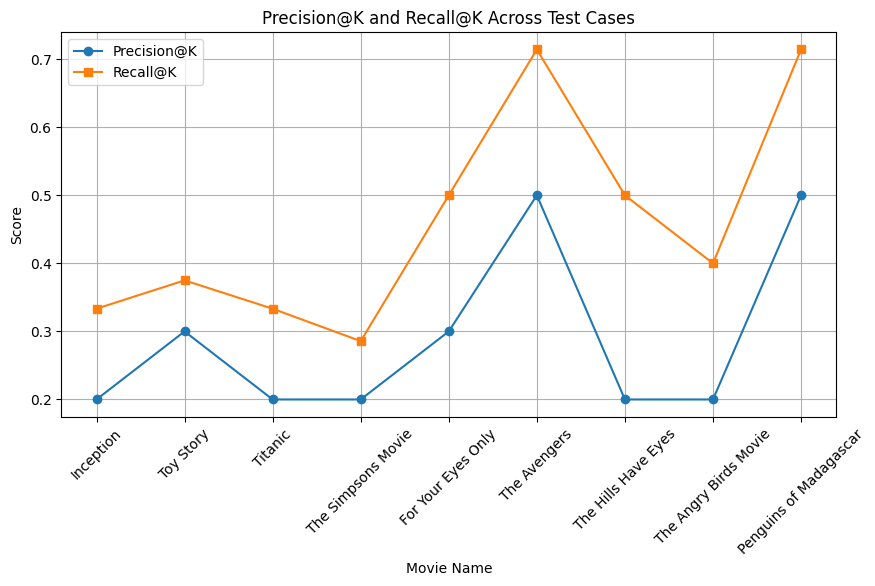

In [11]:
# Plot 1: Precision@K and Recall@K Across Test Cases

plt.figure(figsize=(10, 5))
plt.plot(data_results['movie_name'], data_results['precision_k'], marker='o', label='Precision@K')
plt.plot(data_results['movie_name'], data_results['recall_k'], marker='s', label='Recall@K')
plt.title('Precision@K and Recall@K Across Test Cases')
plt.xlabel('Movie Name')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

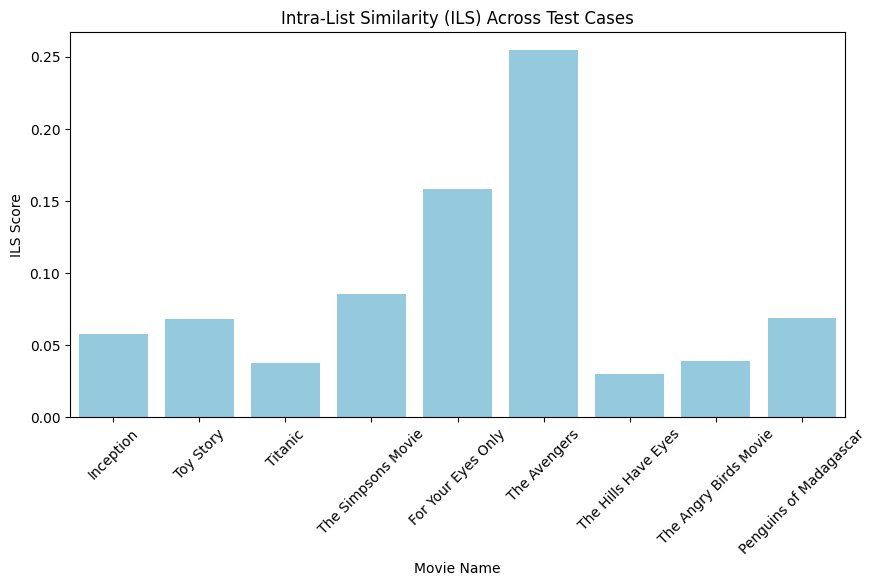

In [12]:
# Plot 2: Intra-List Similarity (ILS) Across Test Cases

plt.figure(figsize=(10, 5))
sns.barplot(x='movie_name', y='ils', data=data_results, color="skyblue")
plt.title('Intra-List Similarity (ILS) Across Test Cases')
plt.xlabel('Movie Name')
plt.ylabel('ILS Score')
plt.xticks(rotation=45)
plt.show()

Precision Values:  0.6 0.5 0.4 0.35
Recall Values:  0.42857142857142855 0.7142857142857143 0.8571428571428571 1.0


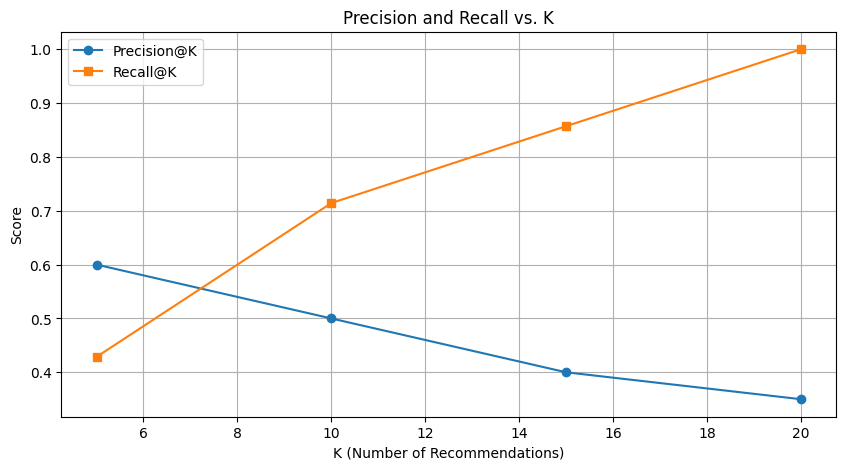

In [13]:
# Plot 3: Precision and Recall vs. K (Varying K)

k_values = [5, 10, 15, 20]
precision_vals = []
recall_vals = []

# Sample evaluation with increasing K for the first test case
for k_val in k_values:
    recommended_movies, _ = get_recommendations(test_cases[5]['movie_name'], k_val)
    precision_vals.append(precision_at_k(recommended_movies, test_cases[5]['relevant_movies'], k_val))
    recall_vals.append(recall_at_k(recommended_movies, test_cases[5]['relevant_movies'], k_val))
    
print("Precision Values: ", *precision_vals)
print("Recall Values: ", *recall_vals)

plt.figure(figsize=(10, 5))
plt.plot(k_values, precision_vals, marker='o', label='Precision@K')
plt.plot(k_values, recall_vals, marker='s', label='Recall@K')
plt.title('Precision and Recall vs. K')
plt.xlabel('K (Number of Recommendations)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()